#📌 Extracão

In [209]:
import pandas as pd

In [210]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science/refs/heads/main/TelecomX_Data.json'
df = pd.read_json(url)
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [211]:
columns_to_normalize = ['customer', 'phone', 'internet', 'account']

# Função para normalizar múltiplas colunas com dicionários
def normalize_dict_columns(df, columns):
    normalized_parts = []
    for col in columns:
        # Normaliza a coluna
        normalized = pd.json_normalize(df[col])
        normalized_parts.append(normalized)

    # Junta com o restante do DataFrame
    df_base = df.drop(columns, axis=1).reset_index(drop=True)
    df_normalized = pd.concat([df_base] + normalized_parts, axis=1)
    return df_normalized

dados_clientes = normalize_dict_columns(df, columns_to_normalize)
dados_clientes

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,No,Yes,No,No,One year,No,Mailed check,55.15,742.9
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,No,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65


In [212]:
type(dados_clientes)

pandas.core.frame.DataFrame

#🔧 Transformação

**Conhecendo o Dataset**

In [213]:
dados_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [214]:
colunas_relevantes = ['customerID','Churn','gender','tenure','Contract','PaymentMethod','PaperlessBilling','PhoneService','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
    'StreamingMovies','Charges.Monthly','Charges.Total']

dados_relevantes_clientes = dados_clientes[colunas_relevantes]
dados_relevantes_clientes

,customerID,Churn,gender,tenure,Contract,PaymentMethod,PaperlessBilling,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,9,One year,Mailed check,Yes,Yes,DSL,No,Yes,No,Yes,Yes,No,65.60,593.3
1,0003-MKNFE,No,Male,9,Month-to-month,Mailed check,No,Yes,DSL,No,No,No,No,No,Yes,59.90,542.4
2,0004-TLHLJ,Yes,Male,4,Month-to-month,Electronic check,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,73.90,280.85
3,0011-IGKFF,Yes,Male,13,Month-to-month,Electronic check,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,98.00,1237.85
4,0013-EXCHZ,Yes,Female,3,Month-to-month,Mailed check,Yes,Yes,Fiber optic,No,No,No,Yes,Yes,No,83.90,267.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,13,One year,Mailed check,No,Yes,DSL,Yes,No,No,Yes,No,No,55.15,742.9
7263,9992-RRAMN,Yes,Male,22,Month-to-month,Electronic check,Yes,Yes,Fiber optic,No,No,No,No,No,Yes,85.10,1873.7
7264,9992-UJOEL,No,Male,2,Month-to-month,Mailed check,Yes,Yes,DSL,No,Yes,No,No,No,No,50.30,92.75
7265,9993-LHIEB,No,Male,67,Two year,Mailed check,No,Yes,DSL,Yes,No,Yes,Yes,No,Yes,67.85,4627.65


In [215]:
dados_relevantes_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   tenure            7267 non-null   int64  
 4   Contract          7267 non-null   object 
 5   PaymentMethod     7267 non-null   object 
 6   PaperlessBilling  7267 non-null   object 
 7   PhoneService      7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Charges.Monthly   7267 non-null   float64
 16  Charges.Total     7267 non-null   object 


**Verificando Inconsistências nos Dados**

In [216]:
dados_relevantes_clientes.isnull().sum()

,0
customerID,0
Churn,0
gender,0
tenure,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
PhoneService,0
InternetService,0
OnlineSecurity,0


In [217]:
dados_relevantes_clientes.duplicated().sum()

np.int64(0)

In [218]:
for col in colunas_relevantes:
    print(col, ' = ',dados_relevantes_clientes[col].unique(),'\n')

customerID  =  ['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH'] 

Churn  =  ['No' 'Yes' ''] 

gender  =  ['Female' 'Male'] 

tenure  =  [ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 64 39 40  6 30 70 57 58 16 32 33 10 21
 61 15 44 22 24 19 47 62 46 52  8 60 48 28 41 53 68 51 31 36 17 18 38 42
  0] 

Contract  =  ['One year' 'Month-to-month' 'Two year'] 

PaymentMethod  =  ['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)'] 

PaperlessBilling  =  ['Yes' 'No'] 

PhoneService  =  ['Yes' 'No'] 

InternetService  =  ['DSL' 'Fiber optic' 'No'] 

OnlineSecurity  =  ['No' 'Yes' 'No internet service'] 

OnlineBackup  =  ['Yes' 'No' 'No internet service'] 

DeviceProtection  =  ['No' 'Yes' 'No internet service'] 

TechSupport  =  ['Yes' 'No' 'No internet service'] 

StreamingTV  =  ['Yes' 'No' 'No internet service'] 

StreamingMovies  =  ['No' 'Yes' 'No internet

**Tratando as Inconsistências**

In [219]:
import numpy as np

In [220]:
dados_relevantes_clientes['Charges.Total'] = dados_relevantes_clientes['Charges.Total'].apply(lambda x: str(x).replace('$','').replace(',','.').replace(' ','').strip())

dados_relevantes_clientes['Charges.Total'] = pd.to_numeric(dados_relevantes_clientes['Charges.Total'], errors='coerce')

dados_relevantes_clientes['Charges.Total'] = dados_relevantes_clientes['Charges.Total'].astype(np.float16)

/tmp/ipython-input-220-1418414720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_relevantes_clientes['Charges.Total'] = dados_relevantes_clientes['Charges.Total'].apply(lambda x: str(x).replace('$','').replace(',','.').replace(' ','').strip())
/tmp/ipython-input-220-1418414720.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_relevantes_clientes['Charges.Total'] = pd.to_numeric(dados_relevantes_clientes['Charges.Total'], errors='coerce')
/tmp/ipython-input-220-1418414720.py:5: SettingWith

In [221]:
dados_relevantes_clientes.isnull().sum()

,0
customerID,0
Churn,0
gender,0
tenure,0
Contract,0
PaymentMethod,0
PaperlessBilling,0
PhoneService,0
InternetService,0
OnlineSecurity,0


In [222]:
dados_relevantes_clientes = dados_relevantes_clientes.fillna(0)
dados_relevantes_clientes['Charges.Total'].isnull().sum()

np.int64(0)

In [223]:
colunas_bool = ['InternetService','PhoneService', 'PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in colunas_bool:
    dados_relevantes_clientes[col] = dados_relevantes_clientes[col].map({'Yes': True, 'No': False, '': False, 'DSL': True, 'Fiber optic': True, 'No internet service': False})

In [224]:
dados_relevantes_clientes['Churn'] = dados_relevantes_clientes['Churn'].str.strip().map({'Yes': True, 'No': False, '': False})

In [225]:
dados_relevantes_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   tenure            7267 non-null   int64  
 4   Contract          7267 non-null   object 
 5   PaymentMethod     7267 non-null   object 
 6   PaperlessBilling  7267 non-null   bool   
 7   PhoneService      7267 non-null   bool   
 8   InternetService   7267 non-null   bool   
 9   OnlineSecurity    7267 non-null   bool   
 10  OnlineBackup      7267 non-null   bool   
 11  DeviceProtection  7267 non-null   bool   
 12  TechSupport       7267 non-null   bool   
 13  StreamingTV       7267 non-null   bool   
 14  StreamingMovies   7267 non-null   bool   
 15  Charges.Monthly   7267 non-null   float64
 16  Charges.Total     7267 non-null   float16


In [226]:
dados_relevantes_clientes.Churn.unique()

array([False,  True])

In [227]:
dados_relevantes_clientes['gender'] = dados_relevantes_clientes['gender'].str.lower()
dados_relevantes_clientes['Contract'] = dados_relevantes_clientes['Contract'].str.lower().str.replace('[^a-zA-Z0-9\-\']', ' ', regex=True)
dados_relevantes_clientes['PaymentMethod'] = dados_relevantes_clientes['PaymentMethod'].str.lower().str.replace('[^a-zA-Z0-9\-\()\']', ' ', regex=True)
dados_relevantes_clientes[['Contract','PaymentMethod']]

,Contract,PaymentMethod
0,one year,mailed check
1,month-to-month,mailed check
2,month-to-month,electronic check
3,month-to-month,electronic check
4,month-to-month,mailed check
...,...,...
7262,one year,mailed check
7263,month-to-month,electronic check
7264,month-to-month,mailed check
7265,two year,mailed check


**Coluna de Contas Diárias**

In [228]:
dados_relevantes_clientes['contas_diarias'] = dados_relevantes_clientes['Charges.Monthly']/30
dados_relevantes_clientes

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,customerID,Churn,gender,tenure,Contract,PaymentMethod,PaperlessBilling,PhoneService,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Charges.Monthly,Charges.Total,contas_diarias
0,0002-ORFBO,False,female,9,one year,mailed check,True,True,True,False,True,False,True,True,False,65.60,593.50,2.186667
1,0003-MKNFE,False,male,9,month-to-month,mailed check,False,True,True,False,False,False,False,False,True,59.90,542.50,1.996667
2,0004-TLHLJ,True,male,4,month-to-month,electronic check,True,True,True,False,False,True,False,False,False,73.90,280.75,2.463333
3,0011-IGKFF,True,male,13,month-to-month,electronic check,True,True,True,False,True,True,False,True,True,98.00,1238.00,3.266667
4,0013-EXCHZ,True,female,3,month-to-month,mailed check,True,True,True,False,False,False,True,True,False,83.90,267.50,2.796667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,False,female,13,one year,mailed check,False,True,True,True,False,False,True,False,False,55.15,743.00,1.838333
7263,9992-RRAMN,True,male,22,month-to-month,electronic check,True,True,True,False,False,False,False,False,True,85.10,1874.00,2.836667
7264,9992-UJOEL,False,male,2,month-to-month,mailed check,True,True,True,False,True,False,False,False,False,50.30,92.75,1.676667
7265,9993-LHIEB,False,male,67,two year,mailed check,False,True,True,True,False,True,True,False,True,67.85,4628.00,2.261667


**Padronização e Transformação de Dados (Renomeando Colunas)**

In [229]:
colunas_bool = ['InternetService','PhoneService', 'PaperlessBilling','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']

for col in colunas_bool:
    dados_relevantes_clientes[col] = dados_relevantes_clientes[col].map({True : 1, False : 0})

In [230]:
dados_relevantes_clientes.rename(columns={'customerID':'id_cliente','Churn':'churn','gender': 'genero','tenure': 'meses_contrato','PhoneService': 'servico_telefone','InternetService': 'internet',
    'OnlineSecurity': 'seguranca_online','OnlineBackup': 'backup_online','DeviceProtection': 'protecao_dispositivo','TechSupport': 'suporte_tecnico','StreamingTV': 'tv_streaming',
    'StreamingMovies': 'filmes_streaming','Contract': 'tipo_contrato','PaperlessBilling': 'fatura_online','PaymentMethod': 'forma_pagamento','Charges.Monthly': 'gasto_mensal',
    'Charges.Total': 'total_gasto'},inplace=True)
dados_relevantes_clientes.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: overflow encountered in cast
  has_large_values = (abs_vals > 1e6).any()


,id_cliente,churn,genero,meses_contrato,tipo_contrato,forma_pagamento,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
0,0002-ORFBO,False,female,9,one year,mailed check,1,1,1,0,1,0,1,1,0,65.6,593.50,2.186667
1,0003-MKNFE,False,male,9,month-to-month,mailed check,0,1,1,0,0,0,0,0,1,59.9,542.50,1.996667
2,0004-TLHLJ,True,male,4,month-to-month,electronic check,1,1,1,0,0,1,0,0,0,73.9,280.75,2.463333
3,0011-IGKFF,True,male,13,month-to-month,electronic check,1,1,1,0,1,1,0,1,1,98.0,1238.00,3.266667
4,0013-EXCHZ,True,female,3,month-to-month,mailed check,1,1,1,0,0,0,1,1,0,83.9,267.50,2.796667


**Salvando os Dados**

In [231]:
dados_relevantes_clientes.to_csv('df_analise_churn.csv',index=False)

#📊 Carga e análise

In [232]:
df_churn = pd.read_csv('/content/df_analise_churn.csv')
df_churn.head()

,id_cliente,churn,genero,meses_contrato,tipo_contrato,forma_pagamento,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
0,0002-ORFBO,False,female,9,one year,mailed check,1,1,1,0,1,0,1,1,0,65.6,593.5,2.186667
1,0003-MKNFE,False,male,9,month-to-month,mailed check,0,1,1,0,0,0,0,0,1,59.9,542.5,1.996667
2,0004-TLHLJ,True,male,4,month-to-month,electronic check,1,1,1,0,0,1,0,0,0,73.9,280.8,2.463333
3,0011-IGKFF,True,male,13,month-to-month,electronic check,1,1,1,0,1,1,0,1,1,98.0,1238.0,3.266667
4,0013-EXCHZ,True,female,3,month-to-month,mailed check,1,1,1,0,0,0,1,1,0,83.9,267.5,2.796667


**Análise Descritiva**

In [233]:
df_churn.groupby('churn').mean(numeric_only=True)

,meses_contrato,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
churn,,,,,,,,,,,,,
False,37.321045,0.539274,0.900519,0.728047,0.330308,0.366988,0.360504,0.332345,0.366062,0.370137,61.354224,2535.263946,2.045141
True,17.979133,0.749064,0.909042,0.939540,0.157838,0.279829,0.291600,0.165864,0.435527,0.437667,74.441332,1531.807223,2.481378


In [234]:
df_churn.groupby('churn').std(numeric_only=True)

,meses_contrato,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
churn,,,,,,,,,,,,,
False,24.178367,0.498501,0.299335,0.445007,0.470367,0.482028,0.480191,0.471098,0.481771,0.482886,31.105006,2330.793392,1.036834
True,19.531123,0.433668,0.287626,0.238401,0.364687,0.449035,0.454621,0.372058,0.495959,0.496232,24.666053,1890.838268,0.822202


In [235]:
df_churn.groupby('churn').median(numeric_only=True)

,meses_contrato,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
churn,,,,,,,,,,,,,
False,37.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,64.50,1664.0,2.150
True,10.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,79.65,703.5,2.655


In [236]:
df_churn.groupby('tipo_contrato').mean(numeric_only=True)

,churn,meses_contrato,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
tipo_contrato,,,,,,,,,,,,,,
month-to-month,0.413233,17.996754,0.667665,0.902122,0.863920,0.186017,0.273908,0.246192,0.173533,0.334831,0.336080,66.344594,1366.743231,2.211486
one year,0.109282,42.190915,0.545095,0.901909,0.754444,0.373930,0.426596,0.439105,0.374589,0.443713,0.452271,65.233344,3050.605741,2.174445
two year,0.027539,56.739530,0.464142,0.904762,0.619621,0.438898,0.435456,0.480780,0.481928,0.444636,0.449225,60.540103,3695.138107,2.018003


In [237]:
df_churn.groupby('forma_pagamento').mean(numeric_only=True)

,churn,meses_contrato,fatura_online,servico_telefone,internet,seguranca_online,backup_online,protecao_dispositivo,suporte_tecnico,tv_streaming,filmes_streaming,gasto_mensal,total_gasto,contas_diarias
forma_pagamento,,,,,,,,,,,,,,
bank transfer (automatic),0.162366,43.527376,0.577093,0.906860,0.780994,0.365639,0.417873,0.413468,0.375079,0.425425,0.431089,66.914726,3052.312222,2.230491
credit card (automatic),0.147959,43.369260,0.582270,0.896684,0.783163,0.387755,0.430485,0.444515,0.391582,0.423469,0.434311,66.535651,3078.264101,2.217855
electronic check,0.438037,25.202045,0.737423,0.904703,0.949284,0.215542,0.345194,0.342740,0.217587,0.483845,0.483027,76.378466,2098.692074,2.545949
mailed check,0.184985,21.786787,0.407207,0.901502,0.538138,0.217417,0.192793,0.179580,0.217417,0.160360,0.161562,43.795916,1045.140018,1.459864


**Distribuição da Evasão**

In [238]:
proporcao_churn = df_churn.churn.value_counts(normalize=True).to_frame()
proporcao_churn

,proportion
churn,
False,0.74281
True,0.25719


/tmp/ipython-input-265-1412145544.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=proporcao_churn, y='proportion', x=proporcao_churn.index, palette='tab10')


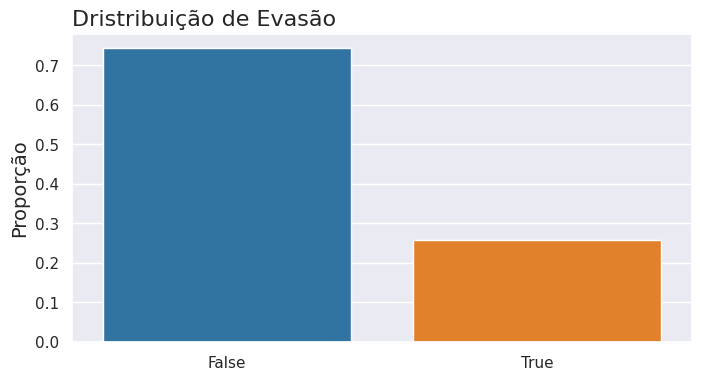

In [265]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=proporcao_churn, y='proportion', x=proporcao_churn.index, palette='tab10')

ax.set_title('Dristribuição de Evasão',fontsize=16,loc='left')
ax.set_xlabel('')
ax.set_ylabel('Proporção',fontsize=14)

fig.savefig('distribuição_churn.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

**Contagem de Evasão por Variáveis Categóricas**

In [240]:
cont_churn_genero = df_churn.groupby('genero')['churn'].value_counts().to_frame()
cont_churn_genero

count
genero churn       
female False   2653
       True     939
male   False   2745
       True     930

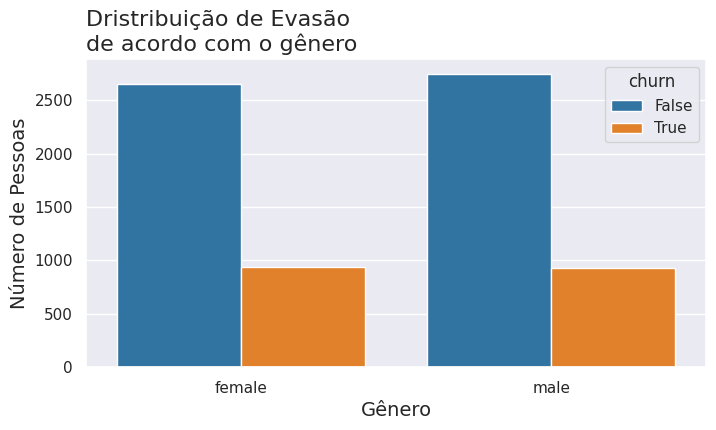

In [264]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=cont_churn_genero, y='count', x='genero',hue='churn', palette='tab10')

ax.set_title('Dristribuição de Evasão\nde acordo com o gênero',fontsize=16,loc='left')
ax.set_xlabel('Gênero',fontsize=14)
ax.set_ylabel('Número de Pessoas',fontsize=14)

fig.savefig('distribuição_churn_genero.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [242]:
cont_churn_pagamento = df_churn.groupby('forma_pagamento')['churn'].value_counts().to_frame()
cont_churn_pagamento

count
forma_pagamento           churn       
bank transfer (automatic) False   1331
                          True     258
credit card (automatic)   False   1336
                          True     232
electronic check          False   1374
                          True    1071
mailed check              False   1357
                          True     308

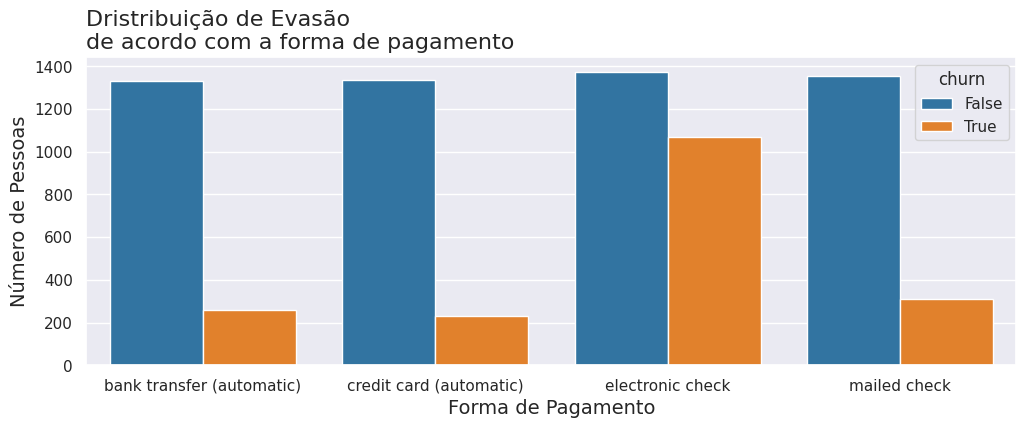

In [263]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(12,4))

ax = sns.barplot(data=cont_churn_pagamento, y='count', x='forma_pagamento',hue='churn', palette='tab10')

ax.set_title('Dristribuição de Evasão\nde acordo com a forma de pagamento',fontsize=16,loc='left')
ax.set_xlabel('Forma de Pagamento',fontsize=14)
ax.set_ylabel('Número de Pessoas',fontsize=14)

fig.savefig('distribuição_churn_forma_pagamento.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [244]:
cont_churn_contrato = df_churn.groupby('tipo_contrato')['churn'].value_counts().to_frame()
cont_churn_contrato

count
tipo_contrato  churn       
month-to-month False   2350
               True    1655
one year       False   1353
               True     166
two year       False   1695
               True      48

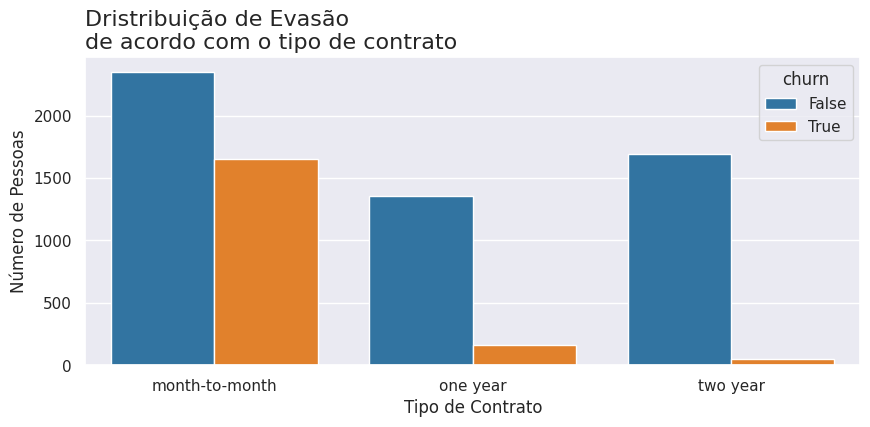

In [262]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(10,4))

ax = sns.barplot(data=cont_churn_contrato, y='count', x='tipo_contrato',hue='churn', palette='tab10')

ax.set_title('Dristribuição de Evasão\nde acordo com o tipo de contrato',fontsize=16,loc='left')
ax.set_xlabel('Tipo de Contrato',fontsize=12)
ax.set_ylabel('Número de Pessoas',fontsize=12)

fig.savefig('distribuição_churn_tipo_contrato.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

**Contagem de Evasão por Variáveis Numéricas**

In [246]:
mean_churn_gastos = df_churn.groupby('churn')['total_gasto'].mean().to_frame()
mean_churn_gastos

,total_gasto
churn,
False,2535.263946
True,1531.807223


/tmp/ipython-input-261-2512478253.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_churn_gastos, y='total_gasto', x='churn', palette='tab10')


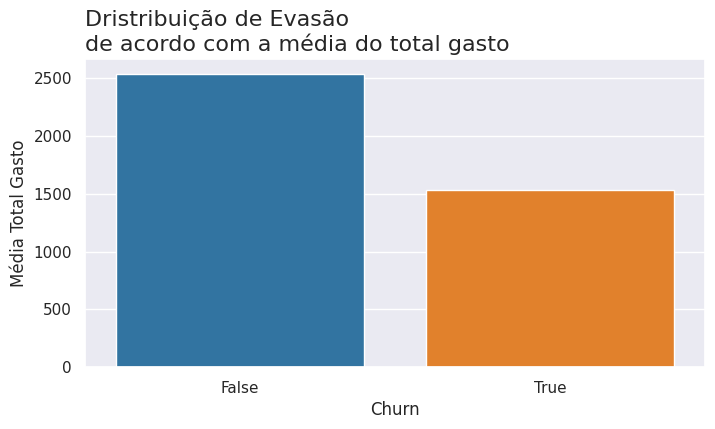

In [261]:
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=mean_churn_gastos, y='total_gasto', x='churn', palette='tab10')

ax.set_title('Dristribuição de Evasão\nde acordo com a média do total gasto',fontsize=16,loc='left')
ax.set_xlabel('Churn',fontsize=12)
ax.set_ylabel('Média Total Gasto',fontsize=12)

fig.savefig('distribuição_churn_total_gasto.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [248]:
mean_churn_gastos_mensal = df_churn.groupby('churn')['gasto_mensal'].mean().to_frame()
mean_churn_gastos_mensal

,gasto_mensal
churn,
False,61.354224
True,74.441332


/tmp/ipython-input-260-3925604085.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_churn_gastos_mensal, y='gasto_mensal', x='churn', palette='tab10')


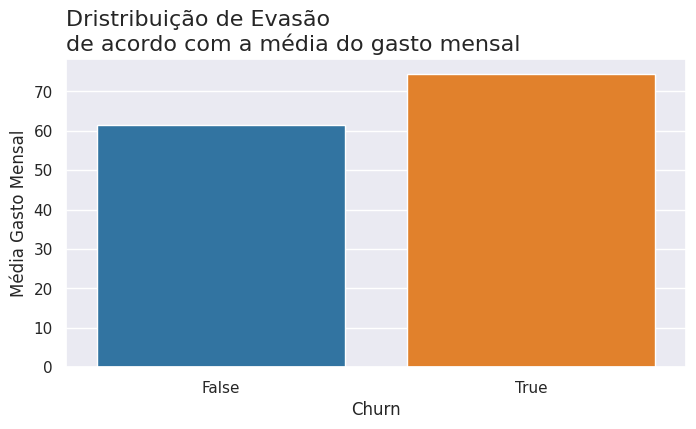

In [260]:
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=mean_churn_gastos_mensal, y='gasto_mensal', x='churn', palette='tab10')

ax.set_title('Dristribuição de Evasão\nde acordo com a média do gasto mensal',fontsize=16,loc='left')
ax.set_xlabel('Churn',fontsize=12)
ax.set_ylabel('Média Gasto Mensal',fontsize=12)

fig.savefig('distribuição_churn_gasto_mensal.png', transparent=False, dpi=300, bbox_inches='tight')

plt.show()

In [250]:
mean_churn_contas_diarias = df_churn.groupby('churn')['contas_diarias'].mean().to_frame()
mean_churn_contas_diarias

,contas_diarias
churn,
False,2.045141
True,2.481378


/tmp/ipython-input-259-3445863268.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=mean_churn_contas_diarias, y='contas_diarias', x='churn', palette='tab10')


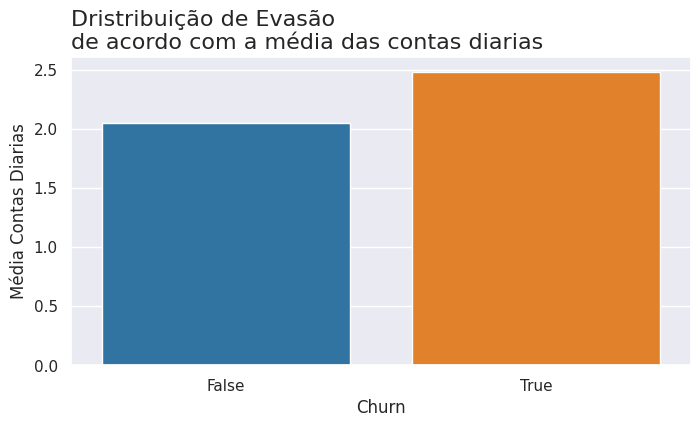

In [259]:
fig, ax = plt.subplots(figsize=(8,4))

ax = sns.barplot(data=mean_churn_contas_diarias, y='contas_diarias', x='churn', palette='tab10')

ax.set_title('Dristribuição de Evasão\nde acordo com a média das contas diarias',fontsize=16,loc='left')
ax.set_xlabel('Churn',fontsize=12)
ax.set_ylabel('Média Contas Diarias',fontsize=12)

fig.savefig('distribuição_churn_contas_diarias.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

In [252]:
cont_churn_meses = df_churn.groupby('meses_contrato')['churn'].value_counts().to_frame()
cont_churn_meses

count
meses_contrato churn       
0              False     11
1              True     380
               False    254
2              False    123
               True     123
...                     ...
70             True      11
71             False    170
               True       6
72             False    363
               True       6

[145 rows x 1 columns]

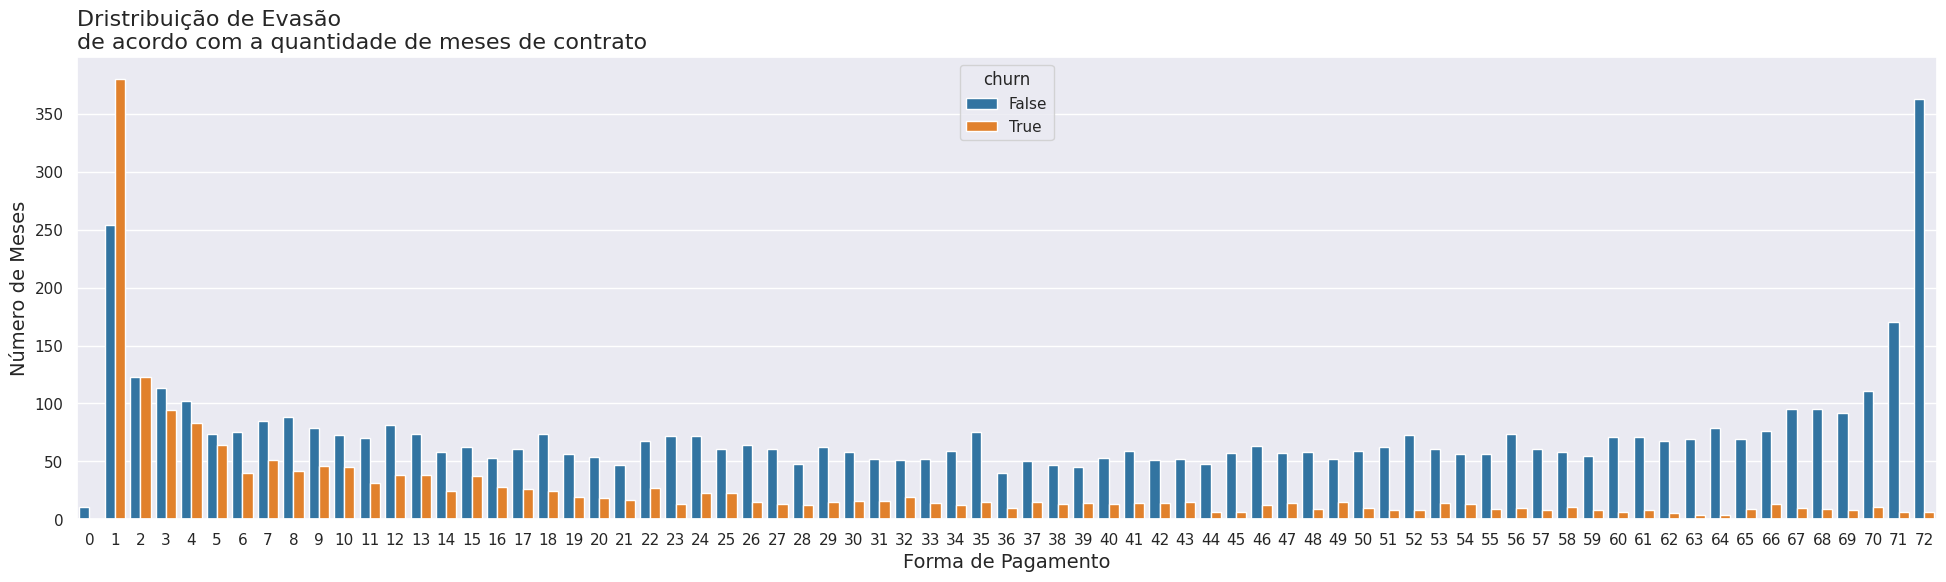

In [258]:
sns.set_theme()
fig, ax = plt.subplots(figsize=(24,6))

ax = sns.barplot(data=cont_churn_meses, y='count', x='meses_contrato',hue='churn', palette='tab10')

ax.set_title('Dristribuição de Evasão\nde acordo com a quantidade de meses de contrato',fontsize=16,loc='left')
ax.set_xlabel('Forma de Pagamento',fontsize=14)
ax.set_ylabel('Número de Meses',fontsize=14)

fig.savefig('distribuição_churn_meses_contrato.png', transparent=False, dpi=300, bbox_inches='tight')
plt.show()

**Análise de Correlação entre Variáveis**

In [254]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id_cliente            7267 non-null   object 
 1   churn                 7267 non-null   bool   
 2   genero                7267 non-null   object 
 3   meses_contrato        7267 non-null   int64  
 4   tipo_contrato         7267 non-null   object 
 5   forma_pagamento       7267 non-null   object 
 6   fatura_online         7267 non-null   int64  
 7   servico_telefone      7267 non-null   int64  
 8   internet              7267 non-null   int64  
 9   seguranca_online      7267 non-null   int64  
 10  backup_online         7267 non-null   int64  
 11  protecao_dispositivo  7267 non-null   int64  
 12  suporte_tecnico       7267 non-null   int64  
 13  tv_streaming          7267 non-null   int64  
 14  filmes_streaming      7267 non-null   int64  
 15  gasto_mensal         

In [255]:
servicos = ['servico_telefone', 'internet', 'seguranca_online',
            'backup_online', 'protecao_dispositivo', 'suporte_tecnico',
            'tv_streaming', 'filmes_streaming']

df_churn['qtd_servicos'] = df_churn[servicos].sum(axis=1)

In [256]:
df_churn[['churn', 'contas_diarias', 'qtd_servicos', 'gasto_mensal', 'total_gasto']].corr()

,churn,contas_diarias,qtd_servicos,gasto_mensal,total_gasto
churn,1.000000,0.189866,-0.028710,0.189866,-0.193343
contas_diarias,0.189866,1.000000,0.822694,1.000000,0.652211
qtd_servicos,-0.028710,0.822694,1.000000,0.822694,0.746112
gasto_mensal,0.189866,1.000000,0.822694,1.000000,0.652211
total_gasto,-0.193343,0.652211,0.746112,0.652211,1.000000


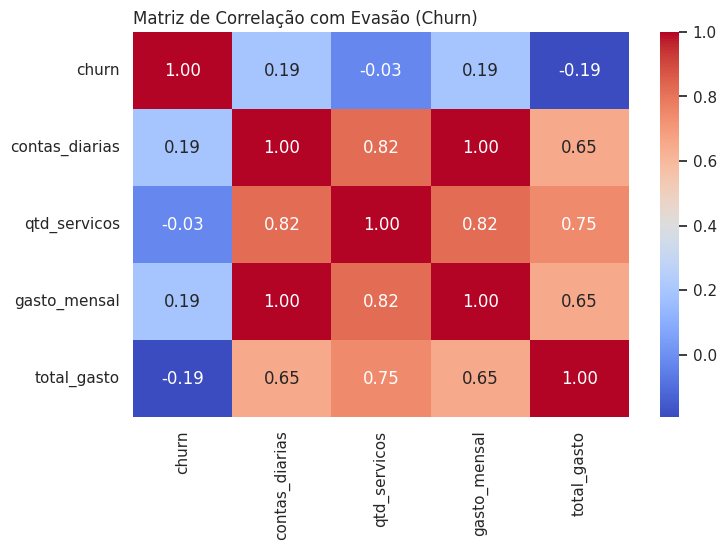

In [257]:
plt.figure(figsize=(8, 5))
sns.heatmap(df_churn[['churn', 'contas_diarias', 'qtd_servicos', 'gasto_mensal', 'total_gasto']].corr(),
            annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação com Evasão (Churn)', loc='left')
plt.show()

#📄Relatorio Final

**1. Introdução**

A Telecom X enfrenta um alto índice de evasão de clientes (churn), o que representa perda de receita e dificuldades na retenção. Este projeto tem como objetivo analisar os dados disponíveis para entender os fatores que mais influenciam o cancelamento de clientes.

A partir dessa análise, espera-se gerar insights estratégicos que ajudem a empresa a tomar decisões mais eficazes para reduzir o churn, melhorar a experiência do cliente e direcionar campanhas personalizadas.

**2. Limpeza e Tratamento de Dados**

Durante a etapa de preparação, foram realizados os seguintes passos:

* Importação dos dados (via API ou arquivo).

* Renomeação de colunas para nomes mais intuitivos e padronizados.

* Conversão de colunas categóricas do tipo "Yes"/"No" para valores booleanos (True/False) e depois para valores inteiros (0 e 1) para fazer analises mais precisas.

* Tratamento de valores ausentes e inválidos (por exemplo, strings vazias convertidas para NaN e depois tratadas).

* Conversão de colunas numéricas (como 'total_gasto' e 'gasto_mensal') de string para float.

* Padronização de textos (letras minúsculas, sem espaços extras).

* Criação de novas variáveis derivadas:

    * contas_diarias → gasto mensal dividido por 30.

    * qtd_servicos → total de serviços contratados por cliente.

**3. Análise Exploratória de Dados (EDA)**

A análise exploratória permitiu identificar diversos padrões relevantes:

🔹 Distribuições
* A maioria dos clientes não cancela o serviço, mas a evasão ainda é significativa.

* O gênero não influencia fortemente o churn.

* Clientes que pagam por meio de chques eletronicos (Electronic Check) tem maior taxa de evasão.

🔹 Gasto e Contrato
* Clientes com contratos mensais apresentaram maior taxa de churn.

* Clientes mais antigos (com mais tempo de contrato) e com mais serviços tendem a ficar.

* Clientes com maior gasto mensal tiveram taxas de churn mais altas.

🔹 Correlação
 A matriz de correlação revelou:

* qtd_servicos tem correlação negativa com churn → quanto mais serviços, menor a chance de evasão.

* contas_diarias e gasto_mensal têm correlação positiva com churn → gastos maiores parecem aumentar o risco de cancelamento.

**4. Conclusões e Insights**

A análise indicou que clientes com contratos mensais apresentam maior propensão ao cancelamento, especialmente quando o gasto mensal é elevado e não há vínculo contratual mais duradouro. Por outro lado, clientes que contratam mais serviços tendem a permanecer na empresa, possivelmente por perceberem maior valor na assinatura. Embora o tipo de pagamento e o uso de fatura digital não se mostrem decisivos isoladamente, esses fatores podem influenciar o churn quando combinados com outras variáveis, como tipo e tempo de contrato.

**5. Recomendações**

1. Incentivar contratos de maior duração com descontos ou benefícios adicionais.

2. Oferecer pacotes de múltiplos serviços com preço promocional para aumentar a adesão.

3. Criar alertas de risco de evasão para clientes com alto gasto e poucos serviços contratados.

4. Focar em retenção de novos clientes (baixa fidelidade nos primeiros meses).

5. Usar esses insights como base para um modelo preditivo de churn, ajudando a antecipar cancelamentos.



**Visualizações usadas:**

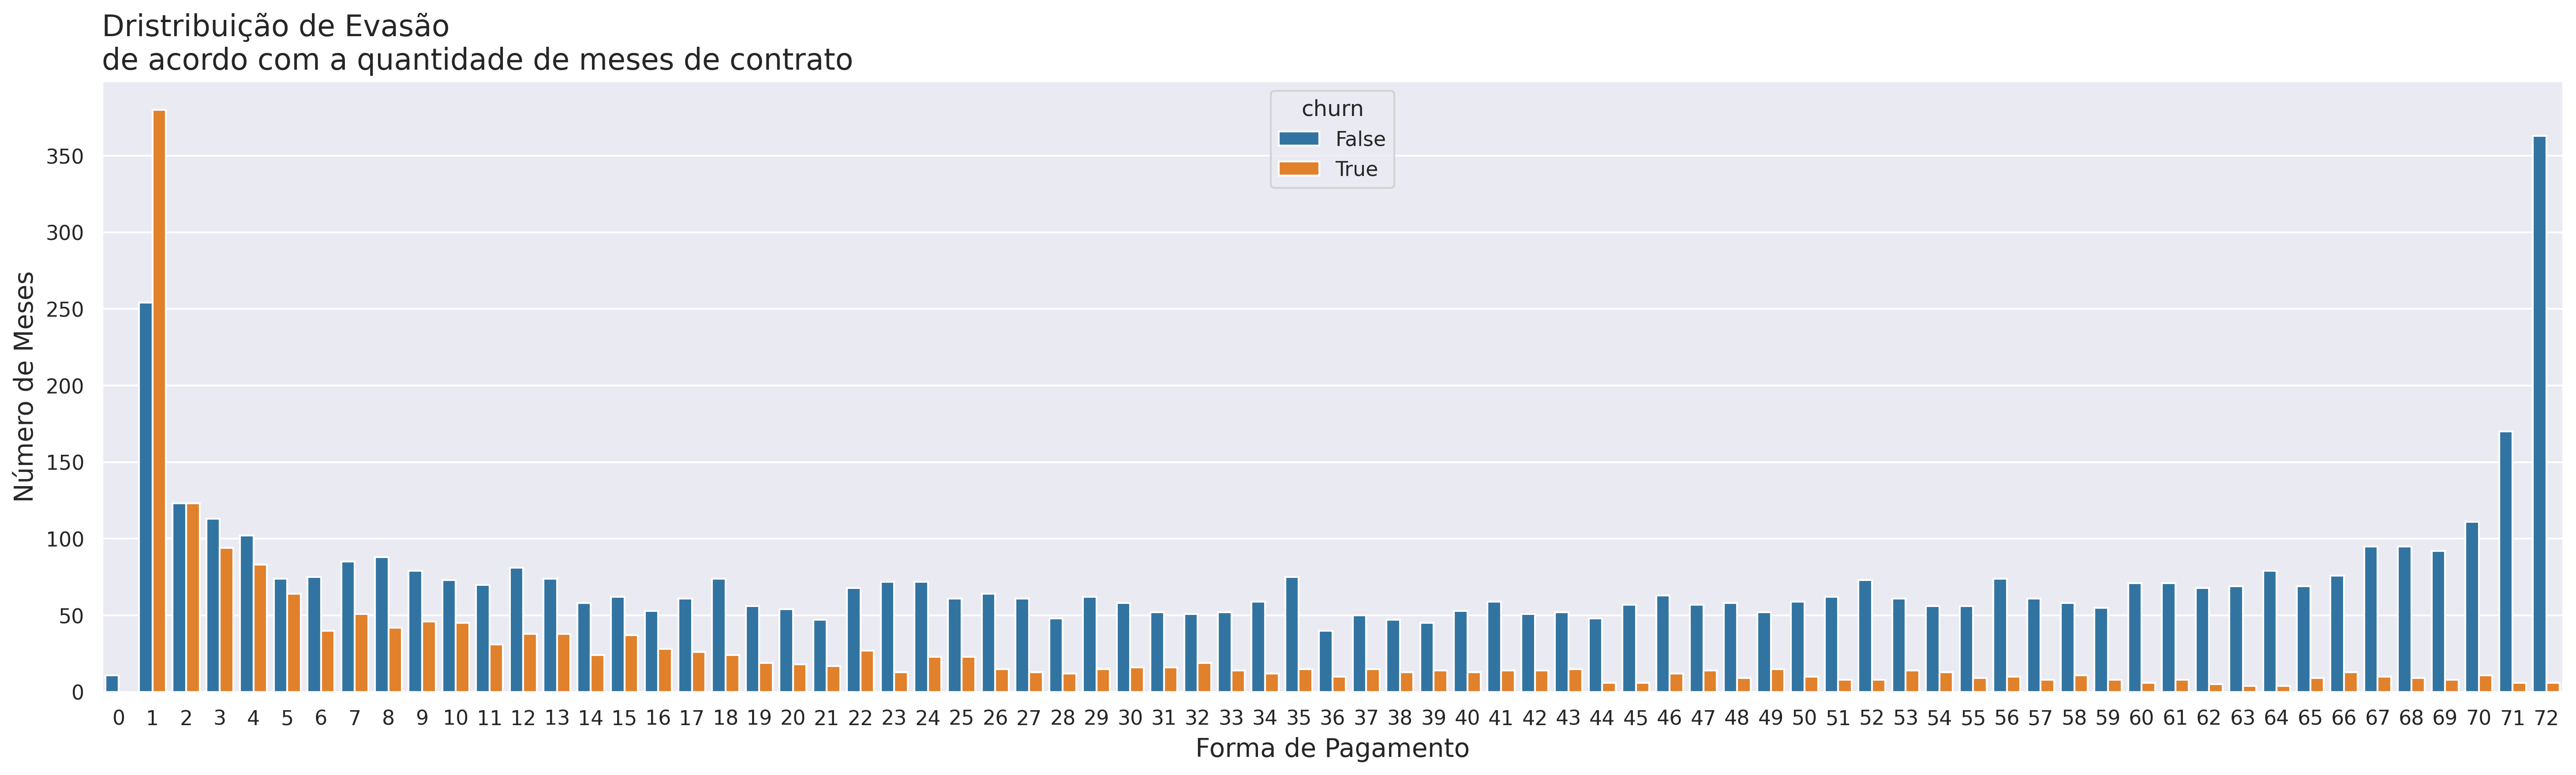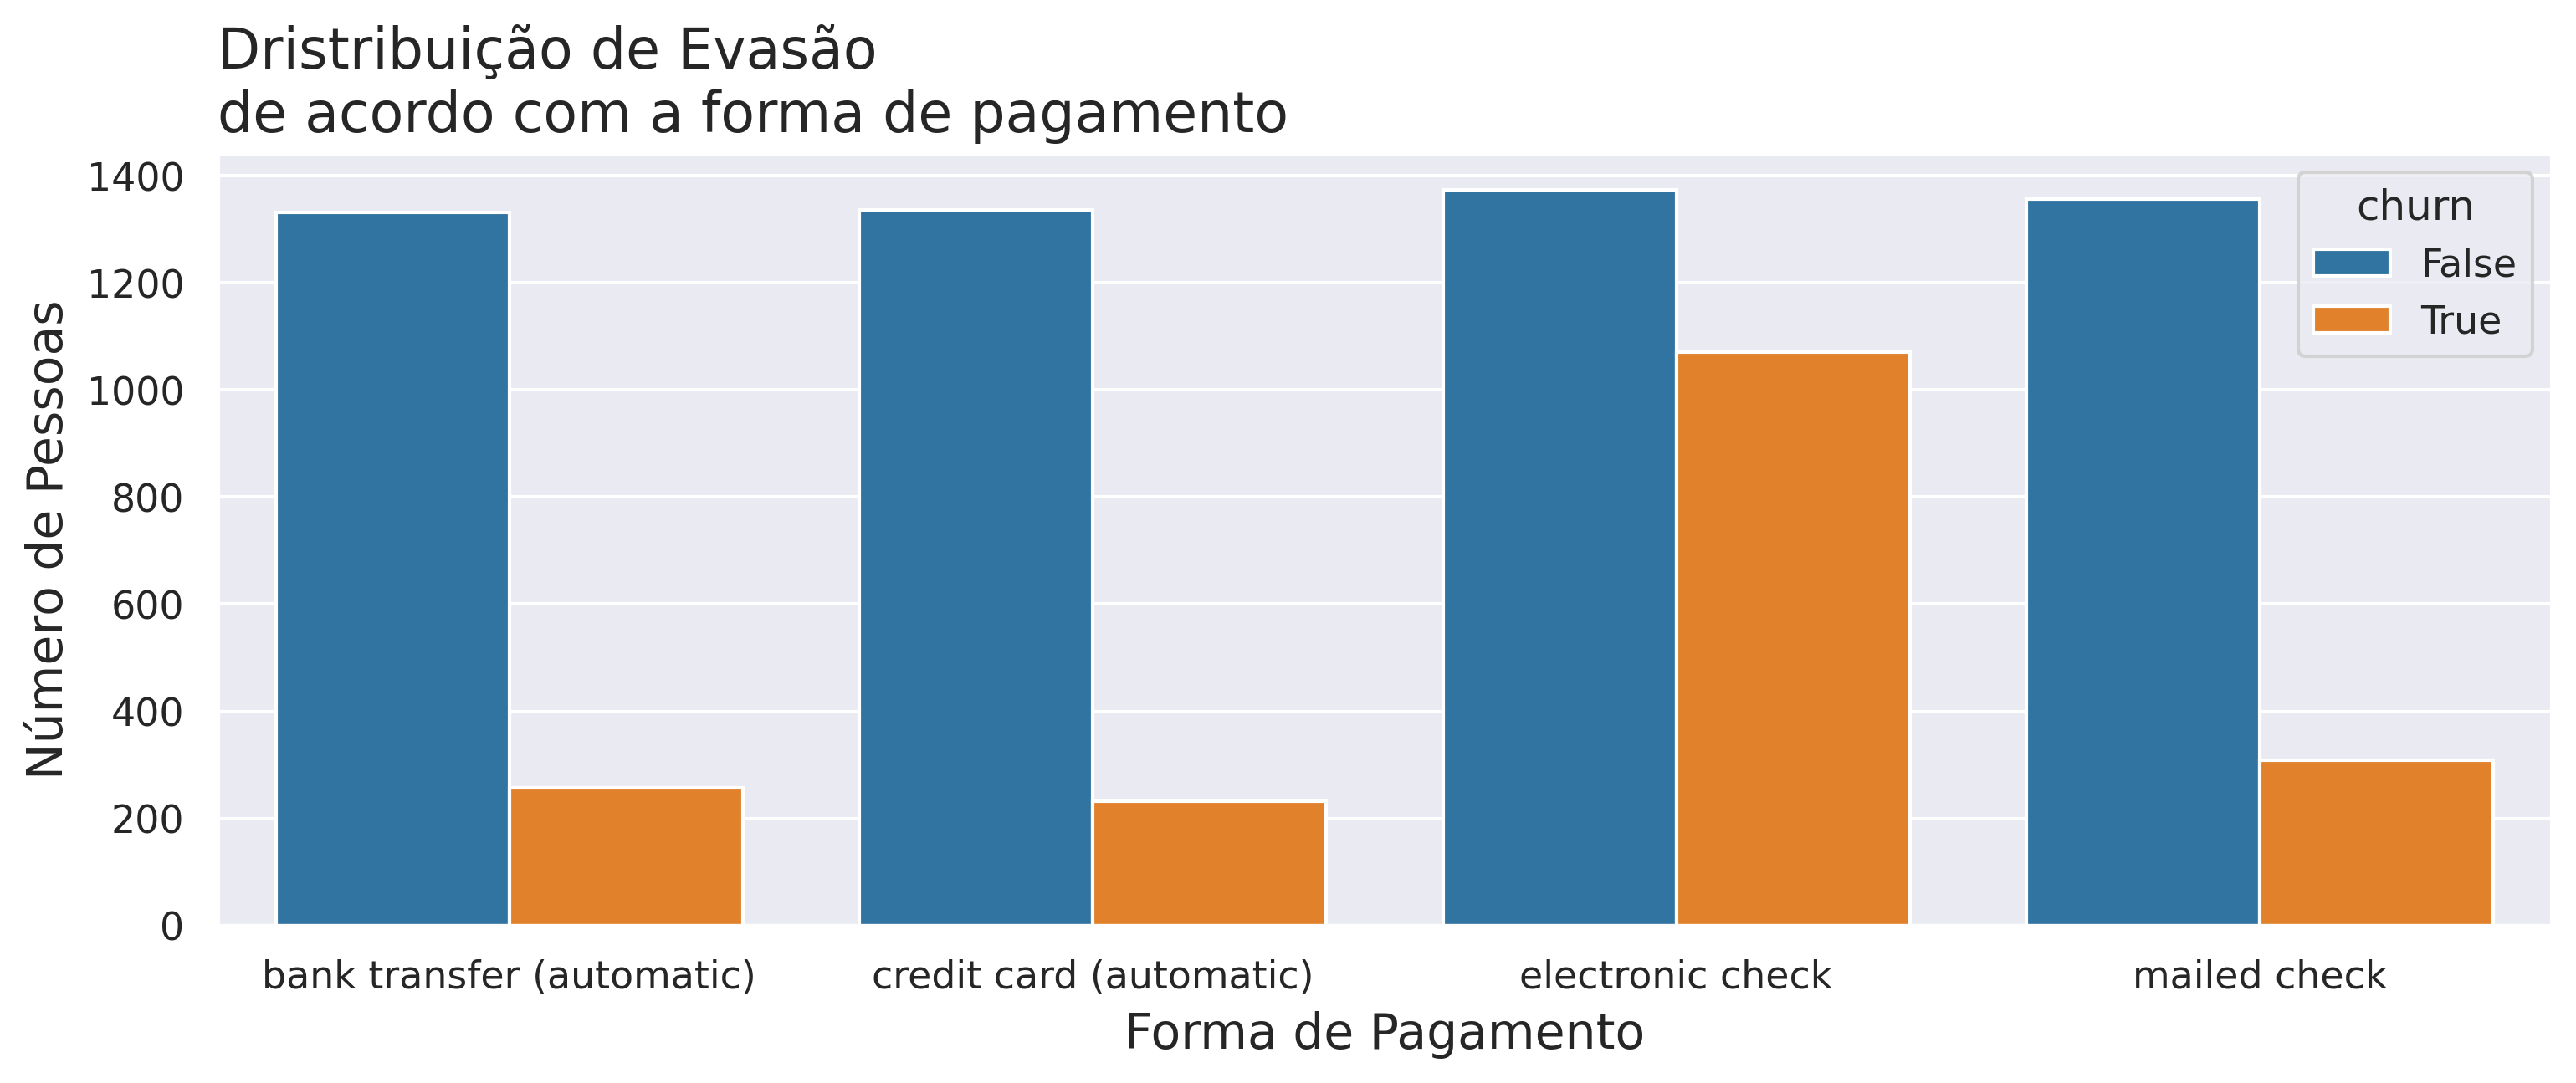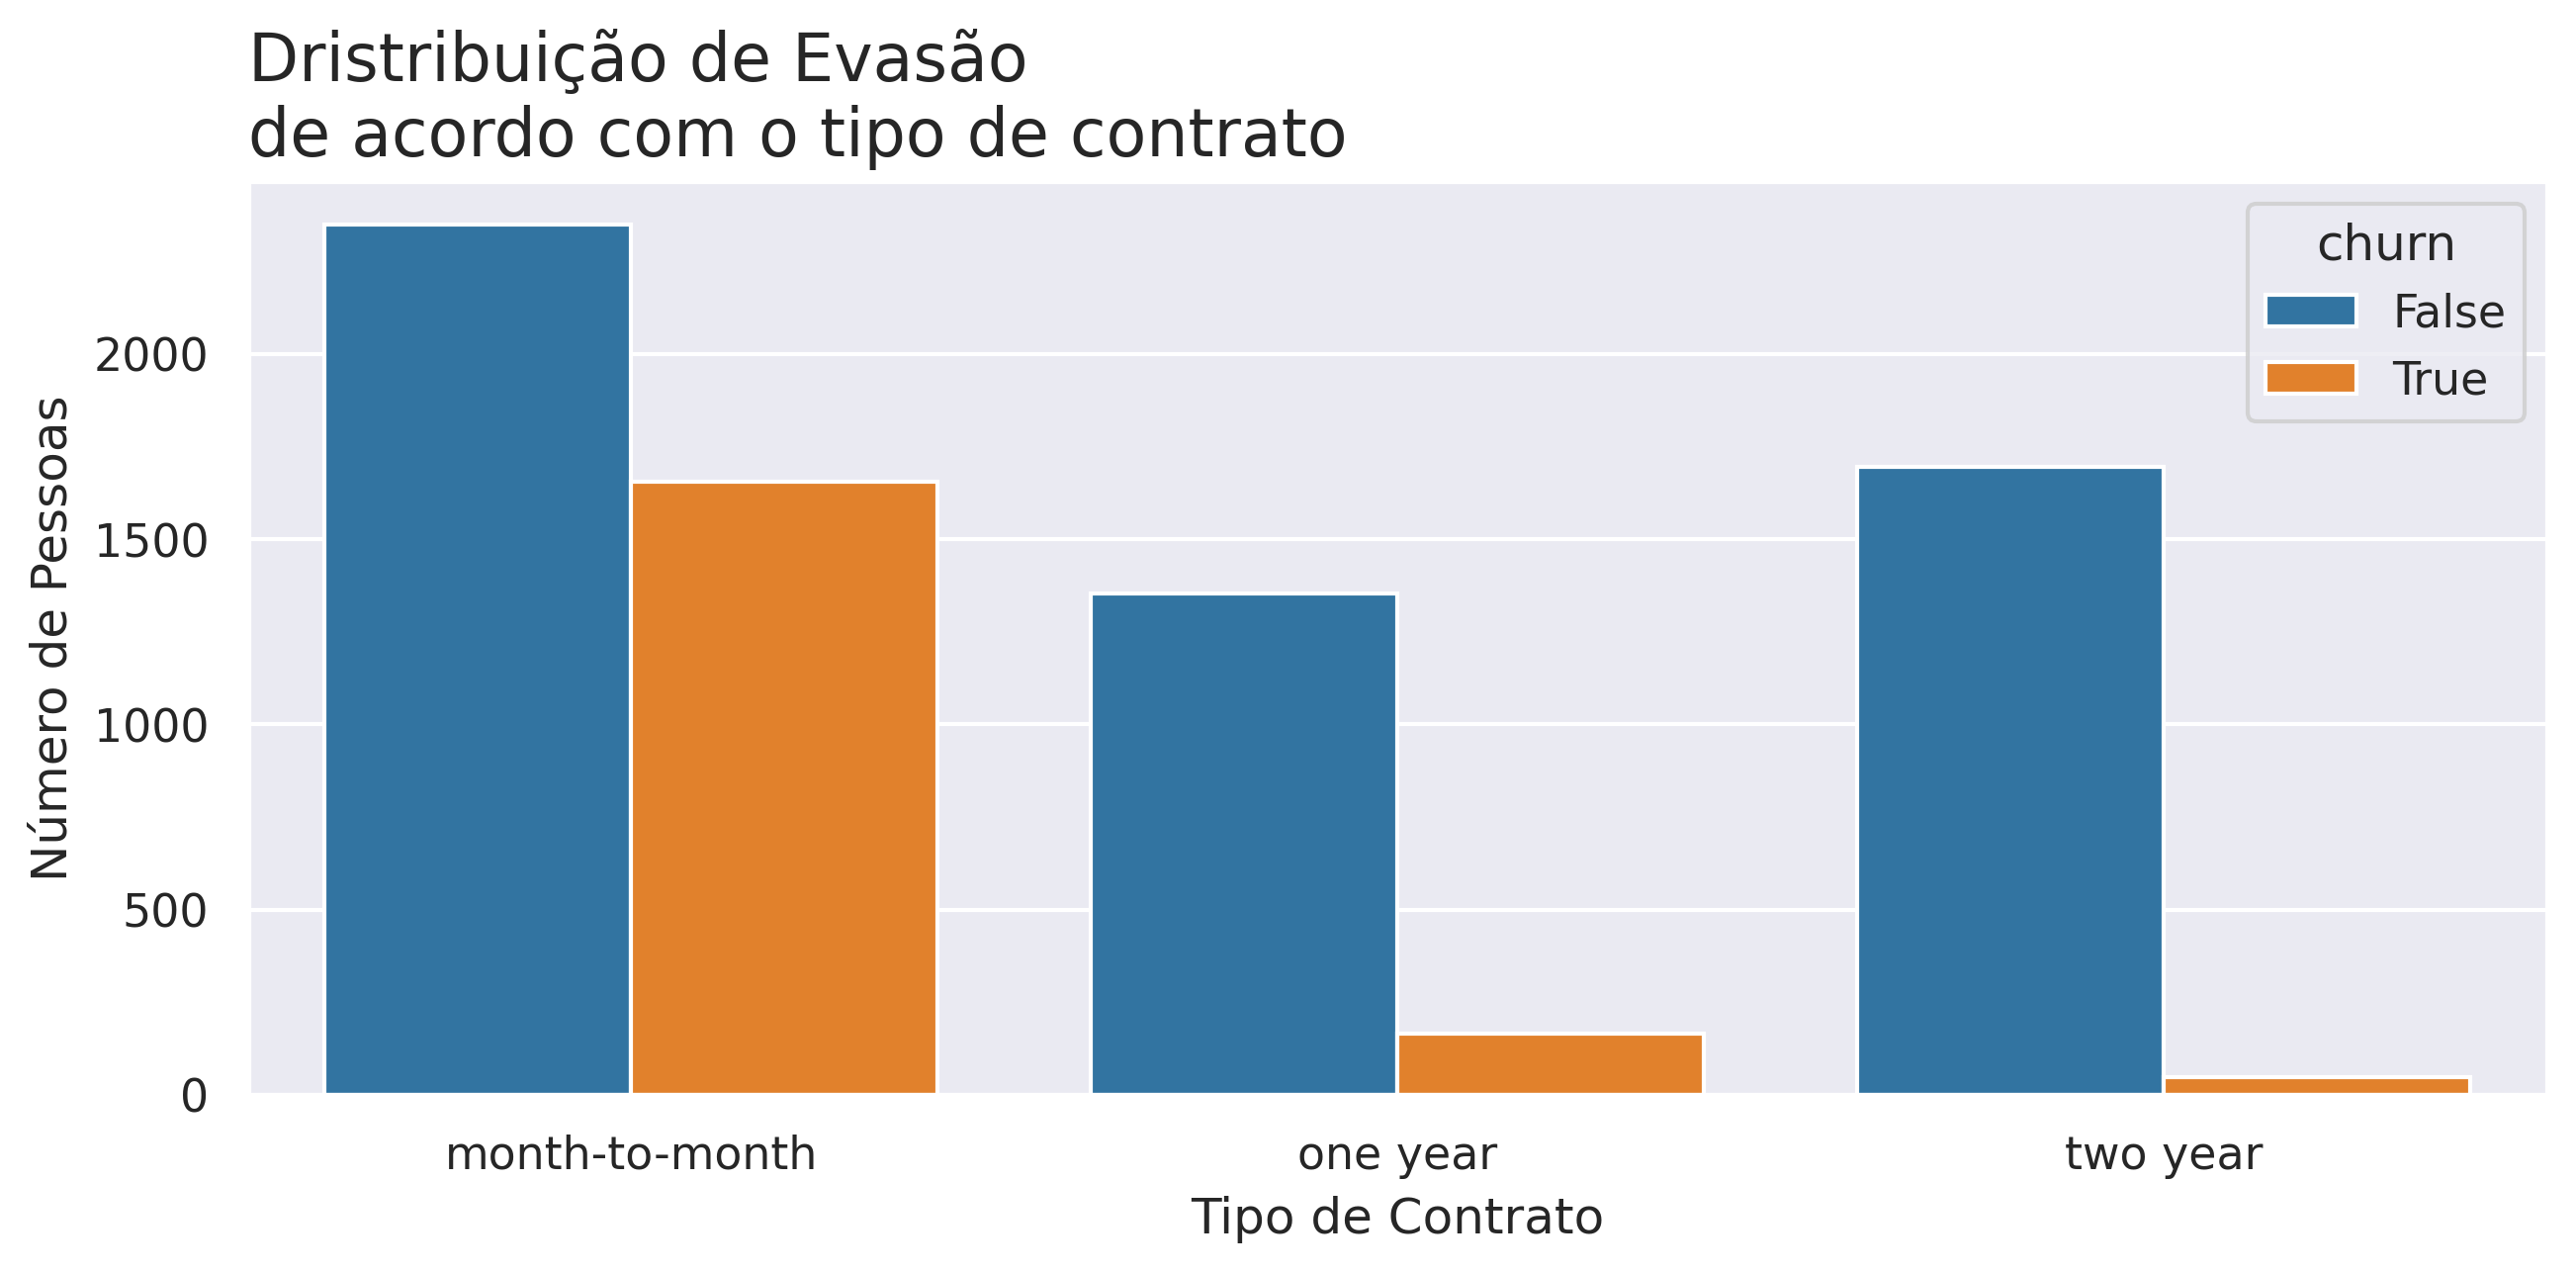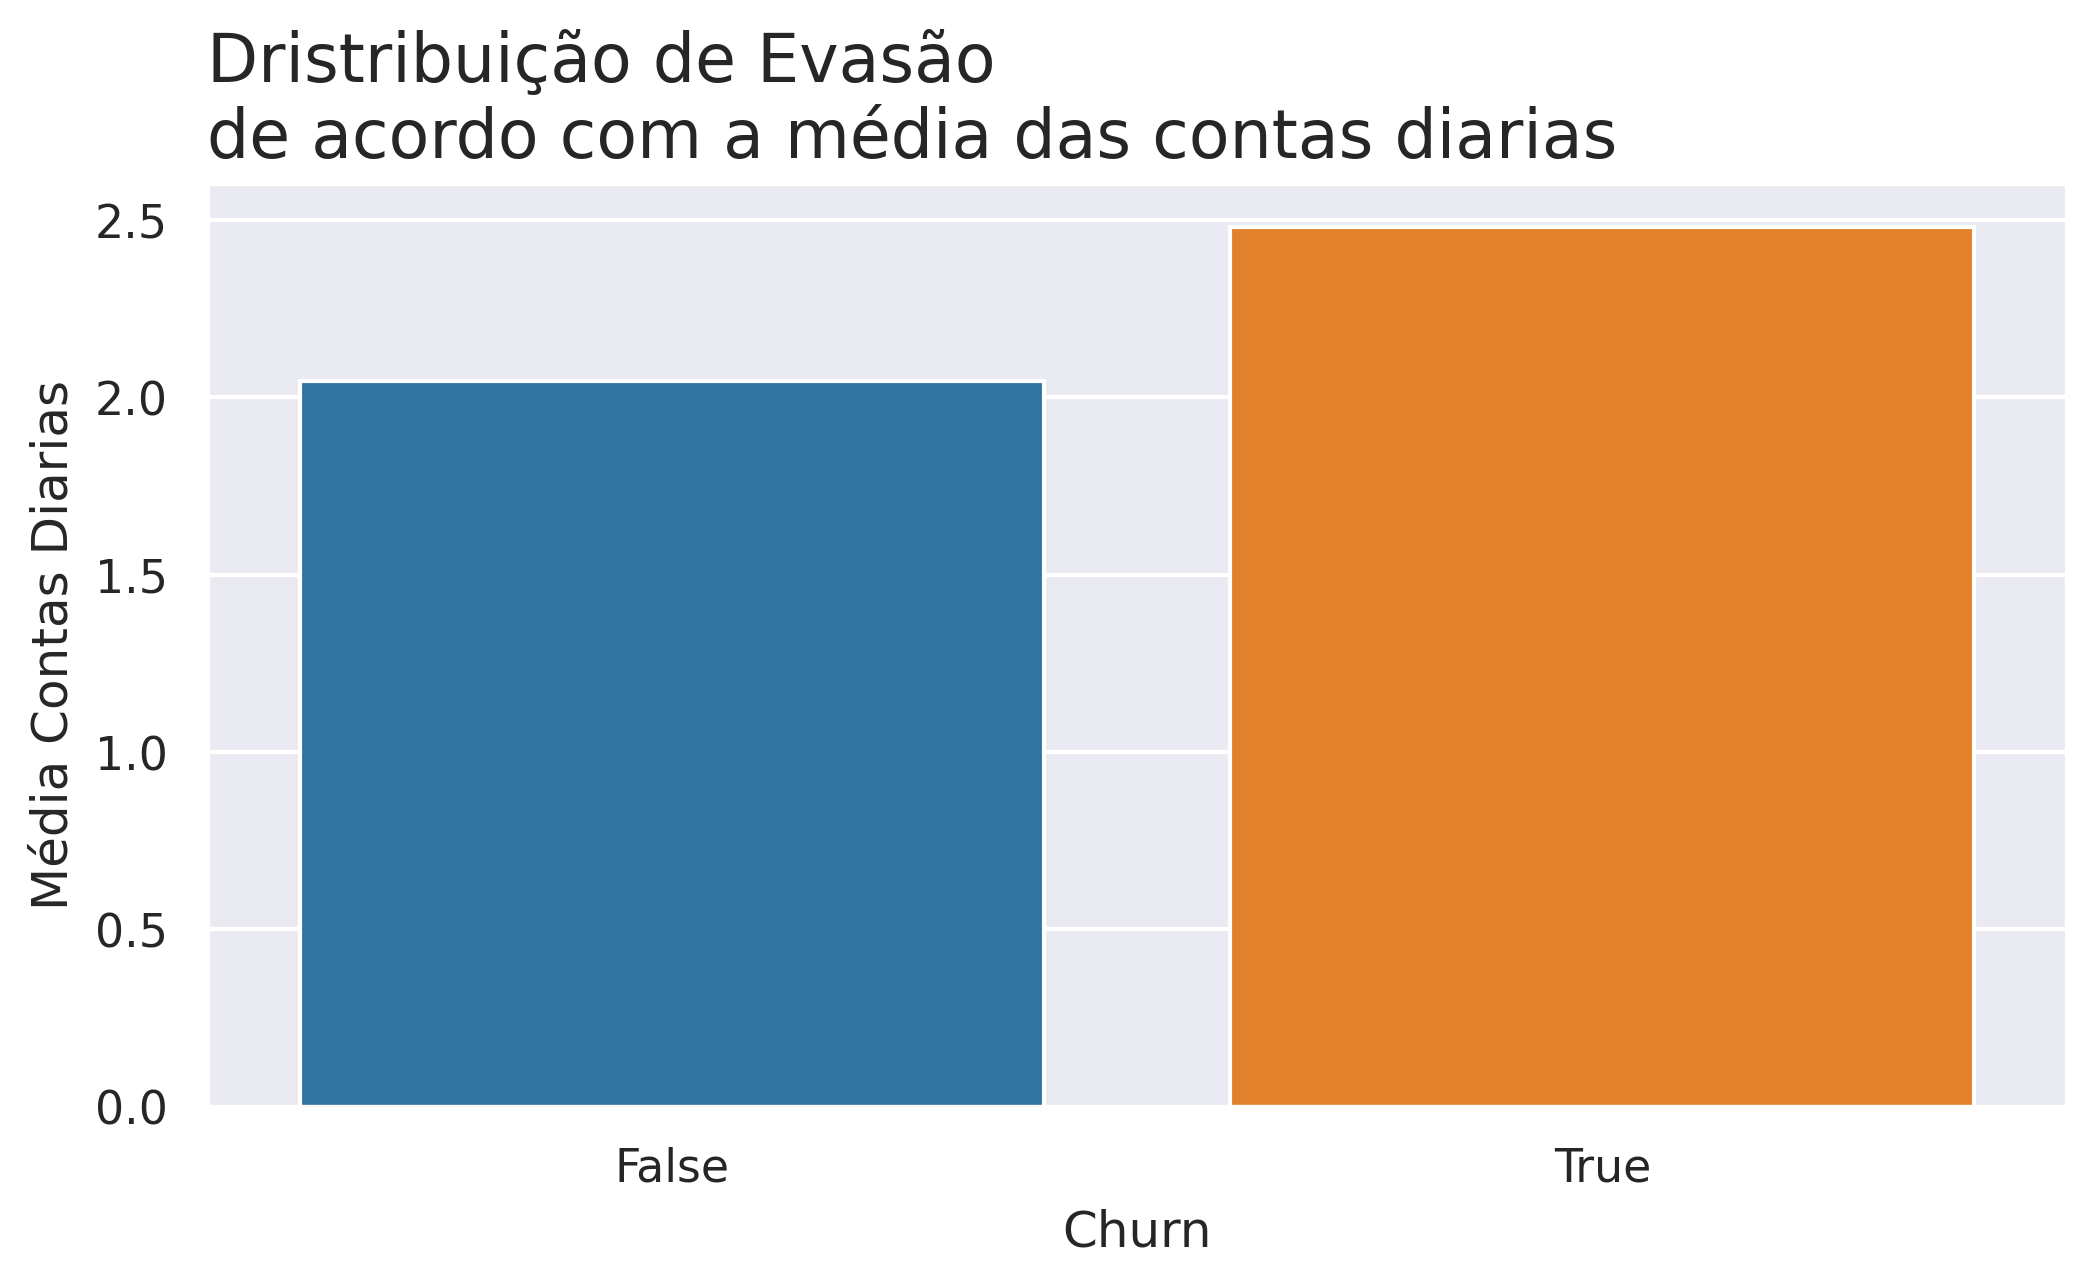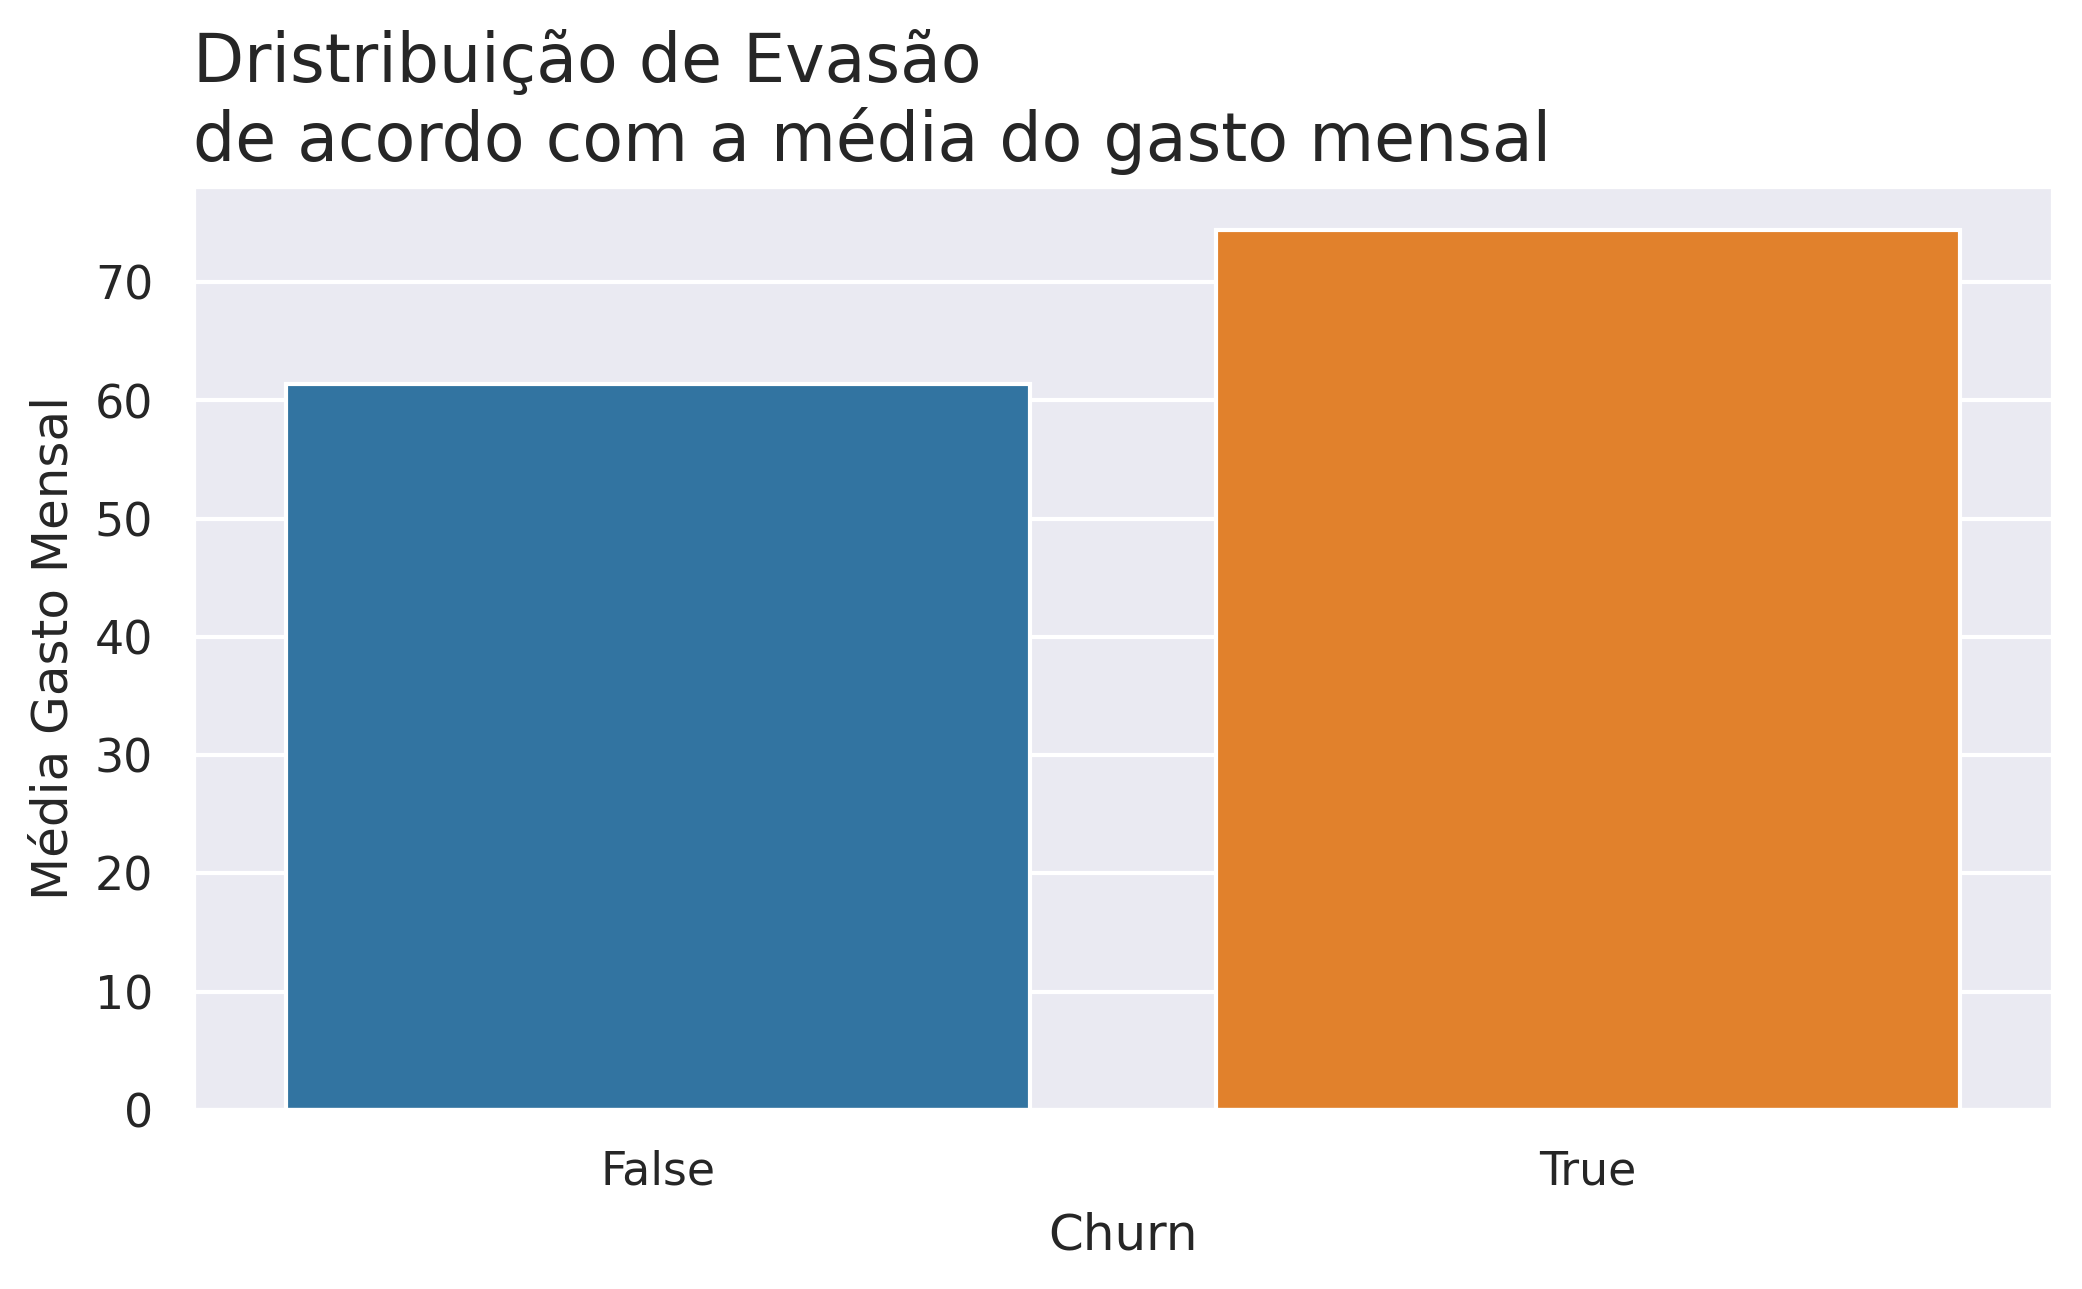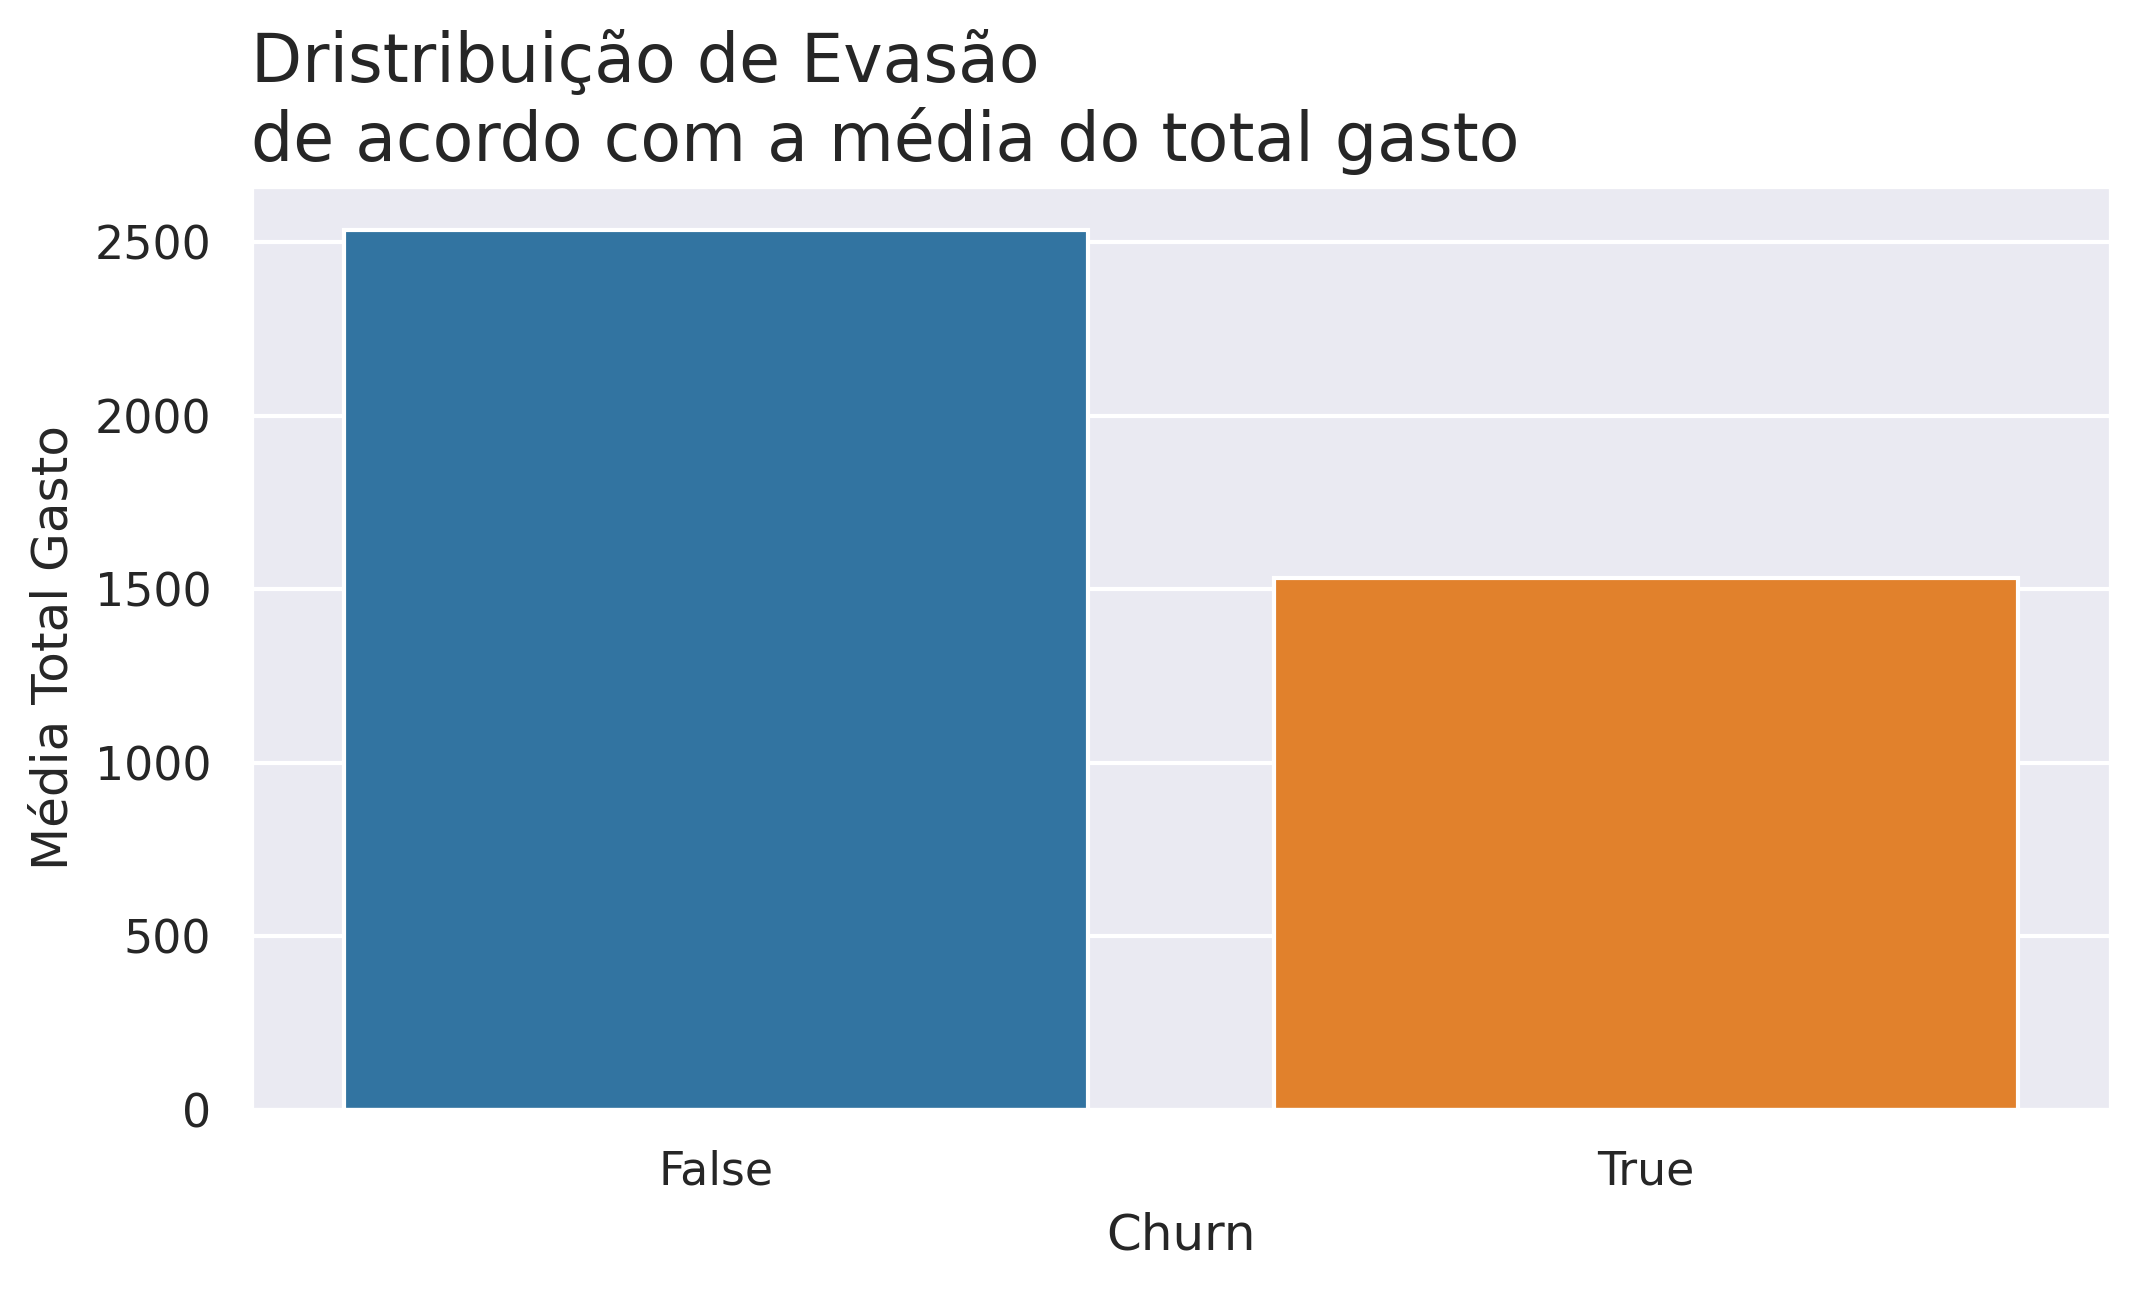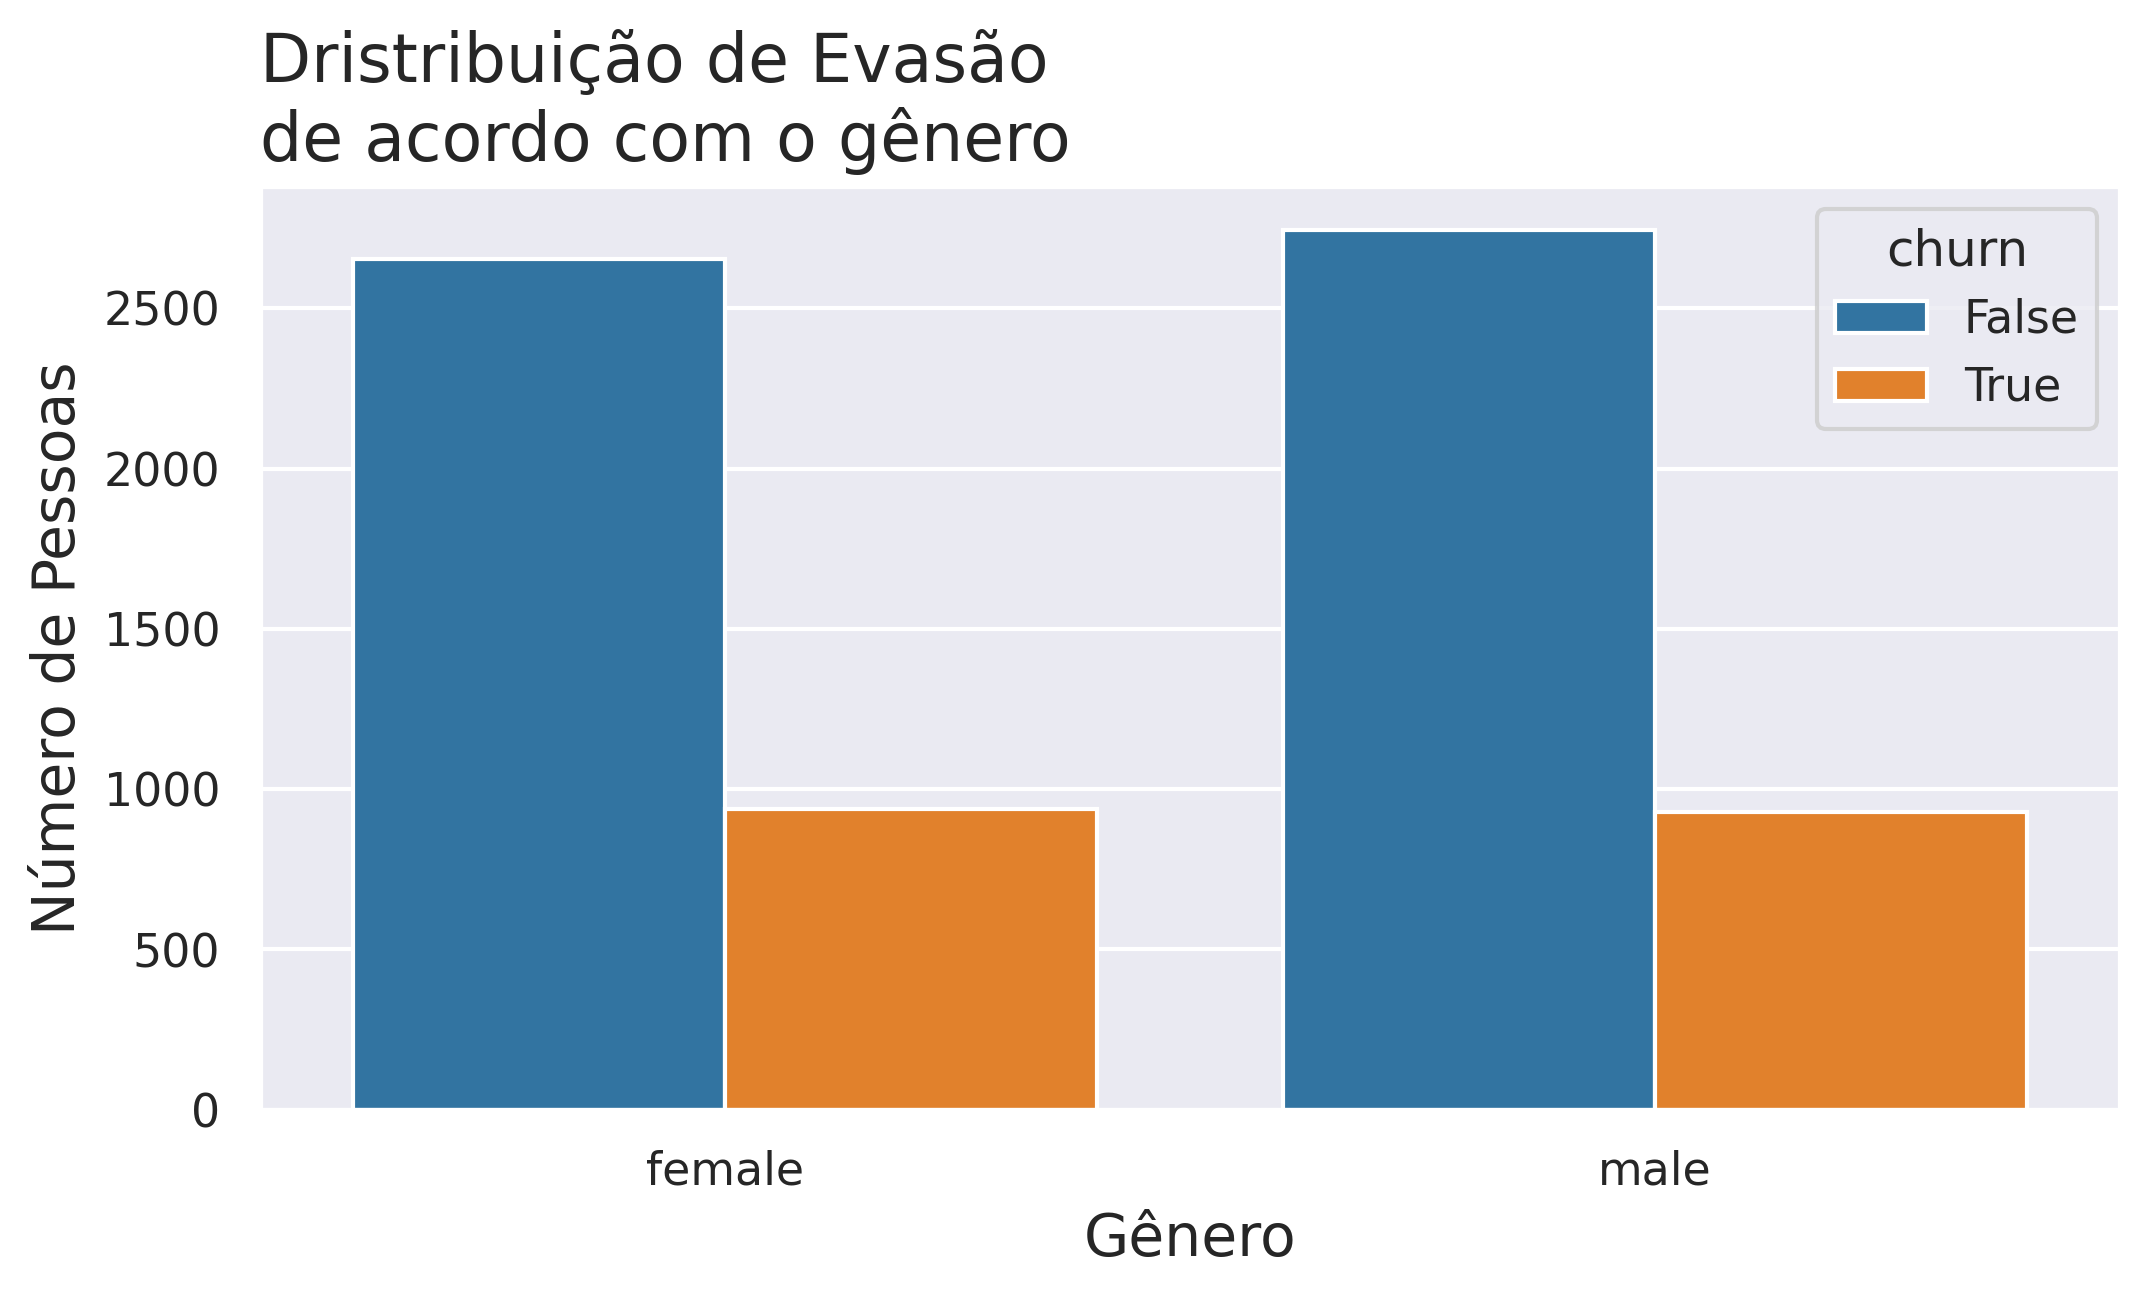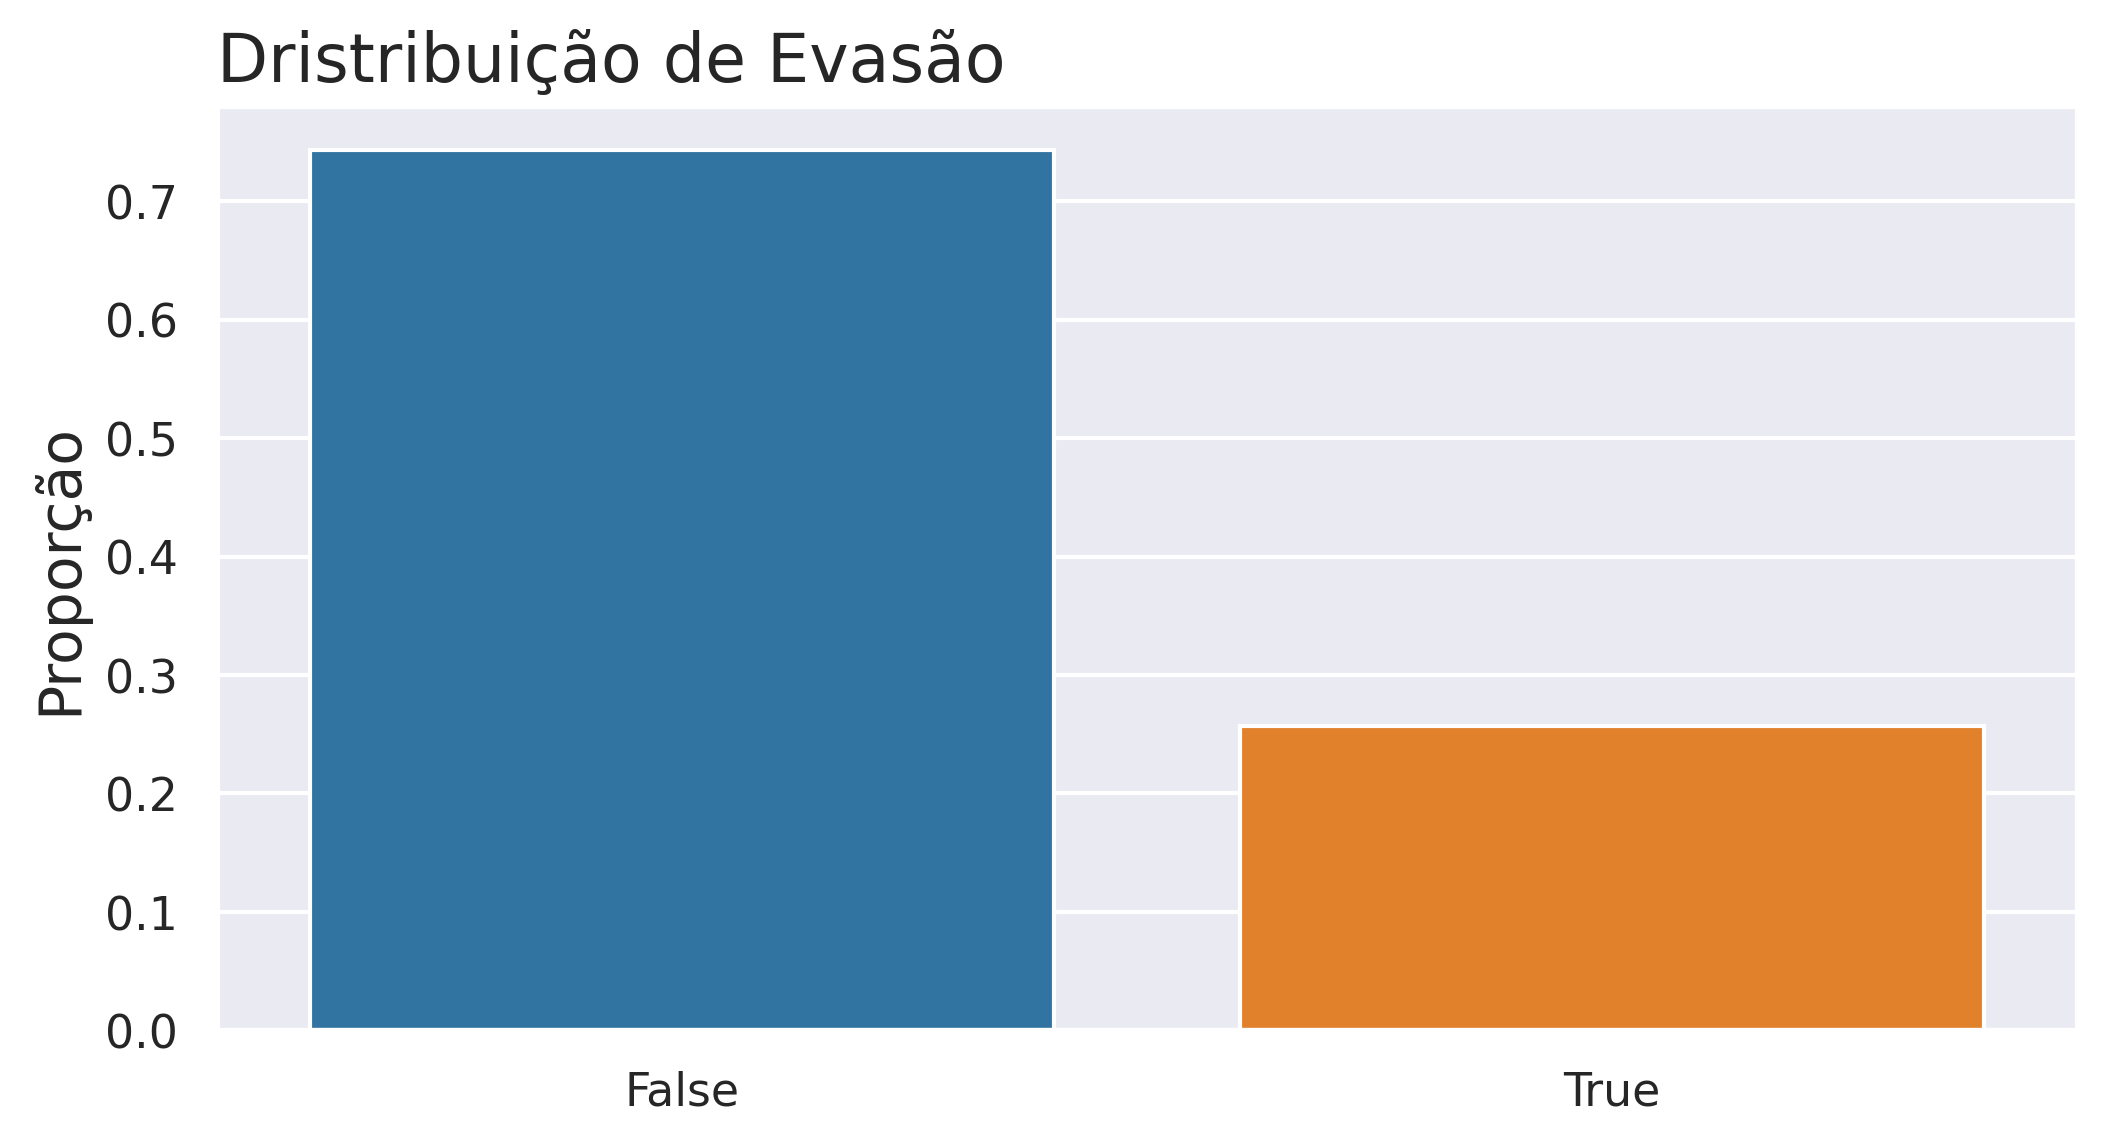